In [13]:
# Import Libraries
import os
import sys
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

# Load Data
# http://ai.stanford.edu/~btaskar/ocr/
input_file = 'letter.data'

In [14]:
# Set Parameters so that the neural network will be trained with 50 data points
# and only for abcd
num_datapoints = 50
orig_labels = 'abcd'
num_orig_labels = len(orig_labels)



In [15]:
# Create a 80/20 train/test set split
num_train = int(0.8 * num_datapoints)
num_test = num_datapoints - num_train

start = 6
end = -1

# Create data set
data = []
labels = []
with open(input_file, 'r') as f:
    for line in f.readlines():
        # Split the current line tabwise
        list_vals = line.split('\t')
        # Check if the label is in our ground truth
        # labels. If not, we should skip it.
        if list_vals[1] not in orig_labels:
            continue
        # Extract the current label and append it
        # to the main list
        label = np.zeros((num_orig_labels, 1))
        label[orig_labels.index(list_vals[1])] = 1
        labels.append(label)

        # Extract the character vector and append it to the main list
        cur_char = np.array([float(x) for x in list_vals[start:end]])
        data.append(cur_char)
        
        # Exit the loop once the required dataset has been created
        if len(data) >= num_datapoints:
            break

# Convert the data and labels to numpy arrays
data = np.asfarray(data)
labels = np.array(labels).reshape(num_datapoints, num_orig_labels)

# Extract the number of dimensions
num_dims = len(data[0])

# Extract the number of dimensions
num_dims = len(data[0])

In [16]:
# Create a feedforward neural network to perform OCR
nn = nl.net.newff([[0, 1] for _ in range(len(data[0]))], 
        [128, 16, num_orig_labels])
# Set the training algorithm to gradient descent 
nn.trainf = nl.train.train_gd

# Train the network
error_progress = nn.train(data[:num_train,:], labels[:num_train,:], 
        epochs=10000, show=100, goal=0.01)


Epoch: 100; Error: 19.66708331349691;
Epoch: 200; Error: 16.063969810150756;
Epoch: 300; Error: 5.180398699624858;
Epoch: 400; Error: 1.1131445155232165;
Epoch: 500; Error: 0.4620050275272952;
Epoch: 600; Error: 0.42062956478255176;
Epoch: 700; Error: 0.30826380105971096;
Epoch: 800; Error: 0.23504822021441704;
Epoch: 900; Error: 0.18698371788141982;
Epoch: 1000; Error: 0.15031701335783618;
Epoch: 1100; Error: 0.12339068450123614;
Epoch: 1200; Error: 0.10285294655307757;
Epoch: 1300; Error: 0.0888010002455998;
Epoch: 1400; Error: 0.0767281812016048;
Epoch: 1500; Error: 0.06866215050572064;
Epoch: 1600; Error: 0.06239985875641489;
Epoch: 1700; Error: 0.056767557808688404;
Epoch: 1800; Error: 0.05284971681451009;
Epoch: 1900; Error: 0.04974041973448905;
Epoch: 2000; Error: 0.04655203216531824;
Epoch: 2100; Error: 0.043918108923011887;
Epoch: 2200; Error: 0.04190370346537034;
Epoch: 2300; Error: 0.03982981408879201;
Epoch: 2400; Error: 0.03773041275899548;
Epoch: 2500; Error: 0.0360153815

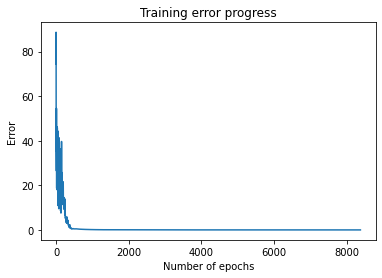

In [17]:
# Plot the error over epochs
# Plotting error
plt.figure() 
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')
plt.show()

In [18]:
# Predict the output for test inputs 
print('\nTesting on unknown data:') 
predicted_test = nn.sim(data[num_train:, :]) 
for i in range(num_test):
    print('\nOriginal:', orig_labels[np.argmax(labels[i])]) 
    print('Predicted:', orig_labels[np.argmax(predicted_test[i])])





Testing on unknown data:

Original: a
Predicted: a

Original: d
Predicted: d

Original: a
Predicted: a

Original: d
Predicted: d

Original: a
Predicted: a

Original: d
Predicted: d

Original: a
Predicted: a

Original: d
Predicted: d

Original: a
Predicted: a

Original: d
Predicted: d


In [26]:
# Calculate the accuracy of the predictions 
correct = [orig_labels[np.argmax(labels[i])] == orig_labels[np.argmax(predicted_test[i])] for i in range(num_test)]
accuracy = sum(correct) / num_test
print("Accuracy: ", accuracy * 100, "%")

Accuracy:  100.0 %
